# Exploración de datos (EDA)

In [22]:
# Análisis inicial de métricas estadísticas de las columnas numéricas del dataset
merged_data.describe()

,BeginDate,EndDate,MonthlyCharges,TotalCharges,OriginalChurn,ContractDuration
count,4832,4832,4832.000000,4832.000000,4832.000000,4832.000000
mean,2017-04-04 15:13:24.635761664,2018-05-22 21:24:44.105960448,81.761207,2902.470788,0.671772,413.257864
min,2013-10-01 00:00:00,2015-01-01 00:00:00,42.900000,42.900000,0.000000,30.000000
25%,2015-05-01 00:00:00,2016-06-30 00:00:00,69.787500,659.600000,0.000000,334.000000
50%,2017-07-01 00:00:00,2019-06-15 12:00:00,82.500000,2350.625000,1.000000,334.000000
75%,2019-03-01 00:00:00,2019-12-01 00:00:00,95.700000,4871.150000,1.000000,334.000000
max,2020-01-01 00:00:00,2020-11-30 00:00:00,118.750000,8684.800000,1.000000,2191.000000
std,NaN,NaN,18.306134,2415.564128,0.469617,362.622174


Puede observarse que el conjunto de datos consta de 4832 filas.  

Las medias en las columnas 'BeginDate' y 'EndDate' son abril de 2017 y mayo de 2018 respectivamente, mientras que ambas presentan una variación estándar con NaN por ser datos tipo datetime.  Lo que sugiere que la fecha de inicio de contrato es más homogénea que la fecha de término, mosntrando una tendencia hacia contratos más cortos.

En la columna 'MonthlyCharges' se presenta una inclinación hacia la derecha, es decir con valores ligeramente más cercanos al máximo. También tiene una variación estándar considerable de 18.30.  Lo que podría indicar que las tarifas mensuales son ligeramente más elevadas que el gasto promedio.  

Respecto a 'TotalCharges' hay una marcada inclinación hacia la izquierda, más cercana a los valores mínimos y es la característica con mayor varición estándar con 2415.56. Lo que sugiere que los clientes pagan cantidades más cercanas a los 42 dólares (mínimo).  

En cuanto a 'ContractDuration' resulta evidente una inclinación hacia la izquierda, más cercanas a los valores mínimos, Observando que la duración de los contratos tienen tendencia a ser más cortos.

## Visualización de datos numéricos

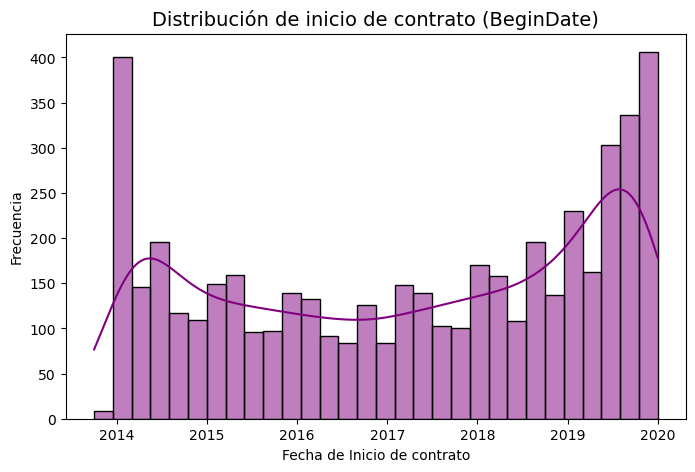

In [23]:
# Distribución de fechas en columna 'BeginDate'
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['BeginDate'], kde=True, color='purple', bins=30)
plt.title('Distribución de inicio de contrato (BeginDate)', fontsize=14)
plt.xlabel('Fecha de Inicio de contrato')
plt.ylabel('Frecuencia')
plt.show()

Hay dos periodos en el que las nuevas contrataciones fueron sustancialmente elevadas a principios de 2014 y el periodo de finales del 2019 al 2020. Por el contrario, a finales de 2013 fue el más bajo con menos de 25 contrataciones nuevas.  

No se debe olvidar que el objetivo del proyecto es la retención de clientes, por lo que, el periodo clave a considerar será de  principios del 2015 a finales del 2018.  

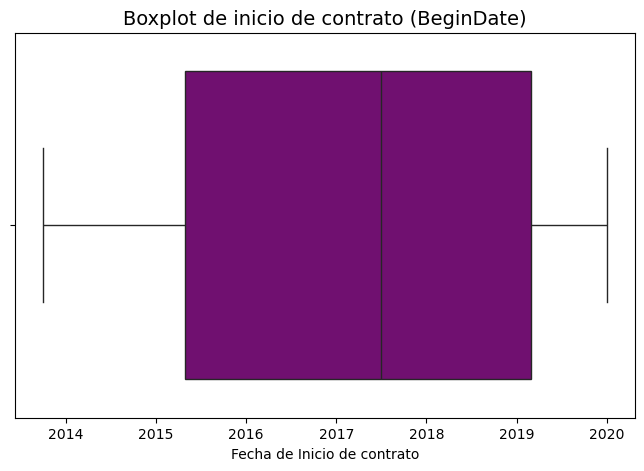

In [24]:
# Boxplot de columna 'BeginDate'
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x=merged_data['BeginDate'], color='purple')
plt.title('Boxplot de inicio de contrato (BeginDate)', fontsize=14)
plt.xlabel('Fecha de Inicio de contrato')
plt.show()

En el boxplot se aprecia que la media es cercana a 2018 y no se aprecian valores atípicos significativos.

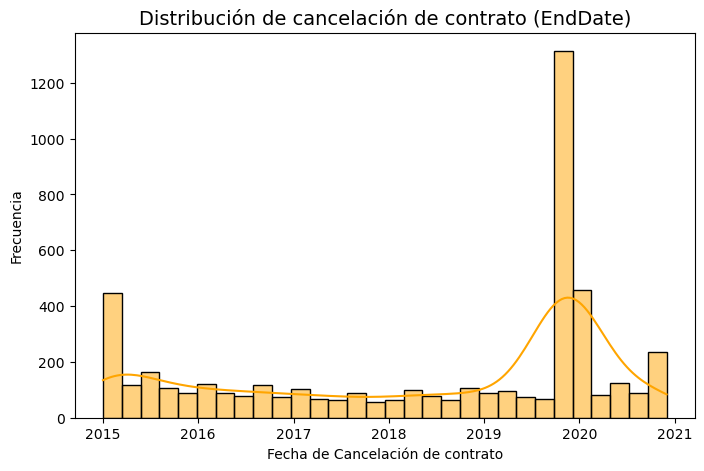

In [25]:
# Distribución de fechas en columna 'EndDate'
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['EndDate'], kde=True, color='orange', bins=30)
plt.title('Distribución de cancelación de contrato (EndDate)', fontsize=14)
plt.xlabel('Fecha de Cancelación de contrato')
plt.ylabel('Frecuencia')
plt.show()

Hay dos periodos donde las cancelaciones de contratos fueron más elevadas de lo normal, en el 2015 y entre finales del 2019 y principios del 2020. Debe analizarse porqué lso clientes cancelaron más durante esos periodos, para poder encontrar hallazgos útiles para la retención de usuarios.

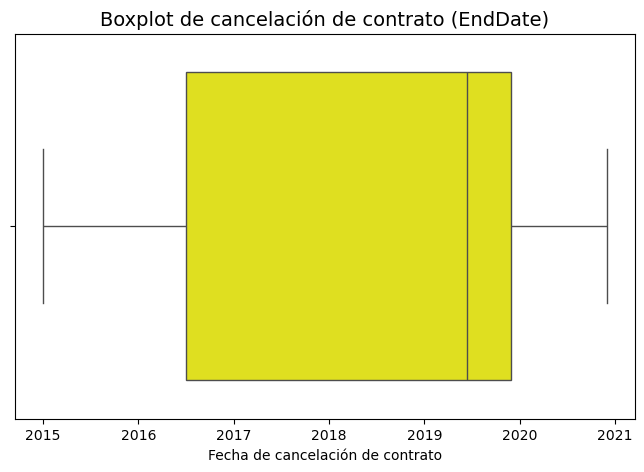

In [26]:
# Boxplot de columna 'EndDate'
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x=merged_data['EndDate'], color='yellow')
plt.title('Boxplot de cancelación de contrato (EndDate)', fontsize=14)
plt.xlabel('Fecha de cancelación de contrato')
plt.show()

En el boxplot la mediana está inclinada hacia valores más altos, por encima de 2019, pero sin valores atípicos.

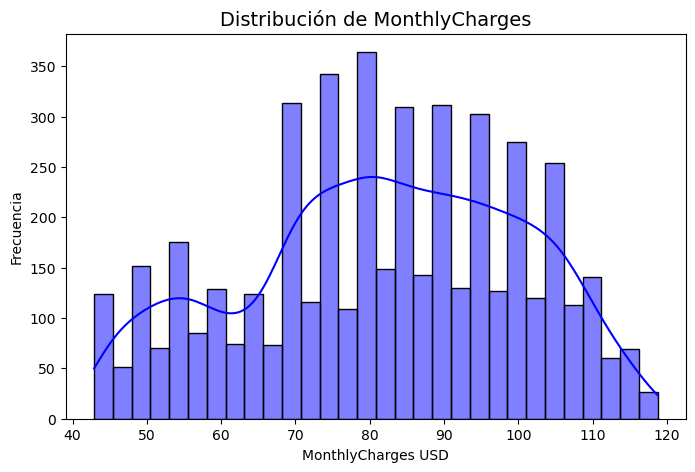

In [27]:
# Histograma de MonthlyCharges con línea KDE para mostrar de forma suavizada como se distribuyen los datos
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['MonthlyCharges'], kde=True, bins=30, color='blue')
plt.title('Distribución de MonthlyCharges', fontsize=14)
plt.xlabel('MonthlyCharges USD')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los clientes pagan alrededor de 70 a 100 USD mensuales. 
Esto podría ser útil para investigar si los extremos menos representativos están vinculados a tasas de cancelación más altas.  

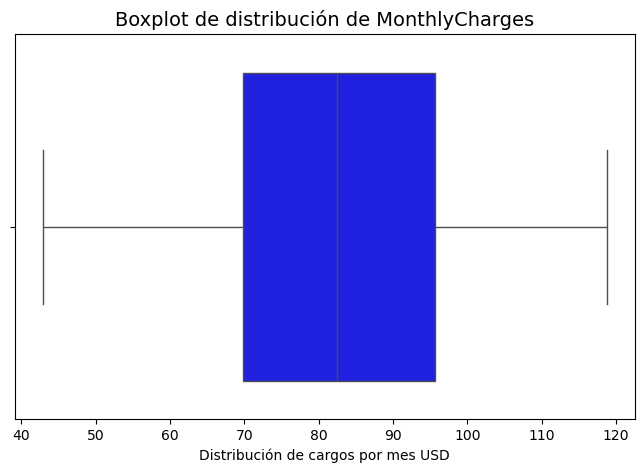

In [28]:
# Boxplot de columna 'MonthlyCharges'
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x=merged_data['MonthlyCharges'], color='blue')
plt.title('Boxplot de distribución de MonthlyCharges', fontsize=14)
plt.xlabel('Distribución de cargos por mes USD')
plt.show()

El boxplot muestra que la mediana se ubica por ligeramente encima de los 80 usd en un rango entre 70 y más de 90 usd, no hay presenncia de valores atípicos

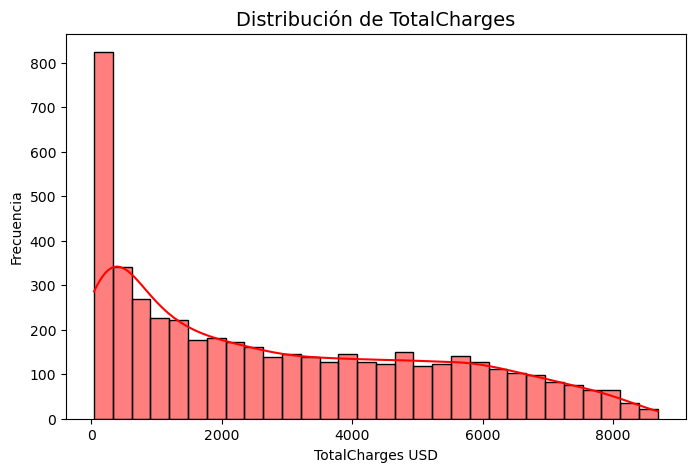

In [29]:
# Histograma de TotalCharges con línea KDE para mostrar de forma suavizada como se distribuyen los datos
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['TotalCharges'], kde=True, bins=30, color='red')
plt.title('Distribución de TotalCharges', fontsize=14)
plt.xlabel('TotalCharges USD')
plt.ylabel('Frecuencia')
plt.show()

La mayor parte de los cargos totales muestra que los clientes tienden a mantenerse en un rango de costos bajo, de menos de 2000 USD, posiblemente por contratos de baja duración. Esto podría ser de utilidad para identificar segmentos de clientela clave y estrategias de retención.  

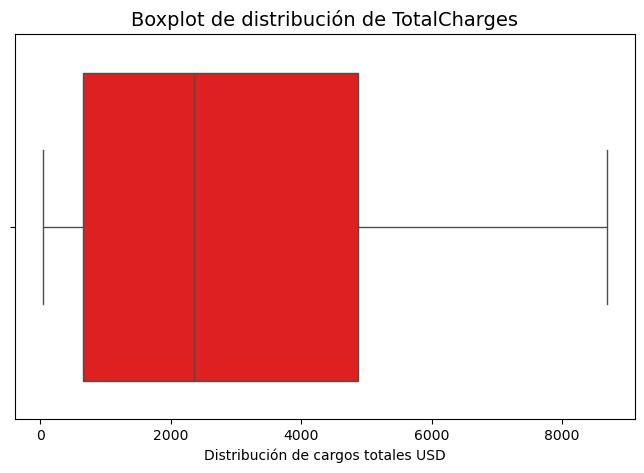

In [30]:
# Boxplot de columna 'TotalCharges'
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x=merged_data['TotalCharges'], color='red')
plt.title('Boxplot de distribución de TotalCharges', fontsize=14)
plt.xlabel('Distribución de cargos totales USD')
plt.show()

El boxplot muestra que los valores de cargos totales se encuentran dentro del rango nromal de la distribución de datos. Sin embargo, el índice intercuartílico está inclinado hacia la izqueirda, sugiriendo que los clientes tienden a hacer cargos pequeños. La mediana está apenas por encima de los 2000 usd.

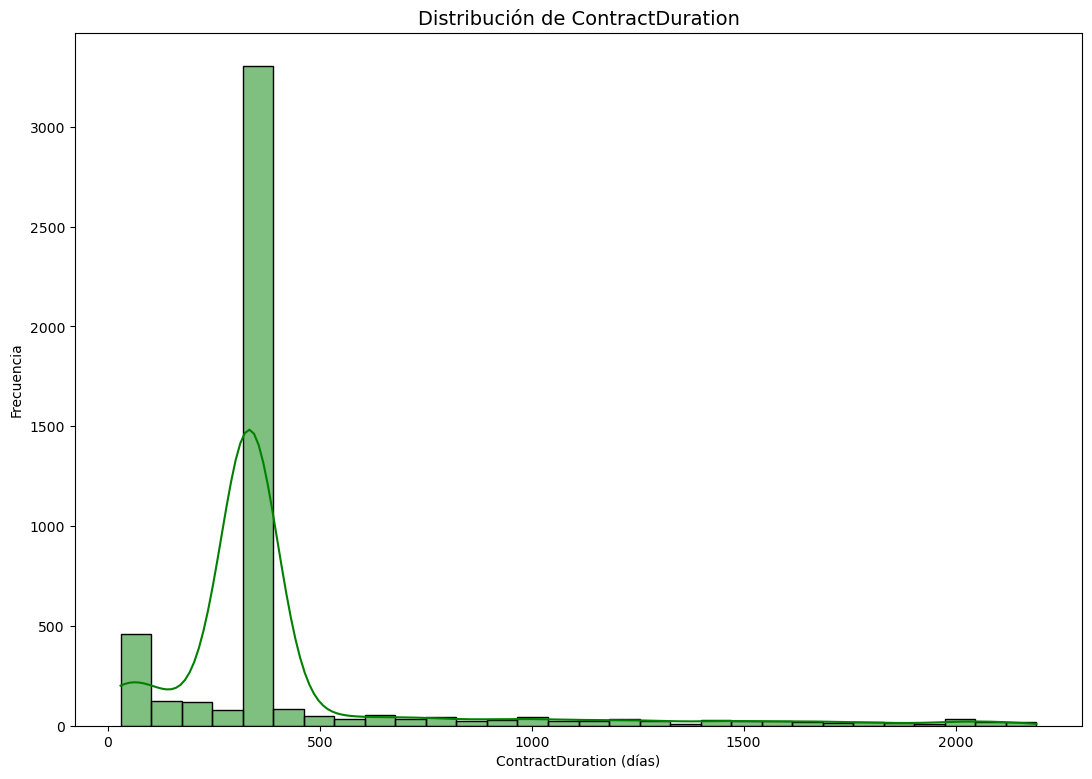

In [31]:
# Histograma de ContractDuration con línea KDE para mostrar de forma suavizada como se distribuyen los datos
plt.figure(figsize=(13, 9))
sns.histplot(merged_data['ContractDuration'], kde=True, bins=30, color='green')
plt.title('Distribución de ContractDuration', fontsize=14)
plt.xlabel('ContractDuration (días)')
plt.ylabel('Frecuencia')
plt.show()

La distribución de 'ContractDuration' muestra que la gran mayorúa de los contratos son por menos de 500 de duración. Coincidiendo con la tendencia de 'TotalCharges'. Se debe analziar más a detalle porqué lso clientes prefieren los contratos de corta duración y diseñar estrategias afines. 

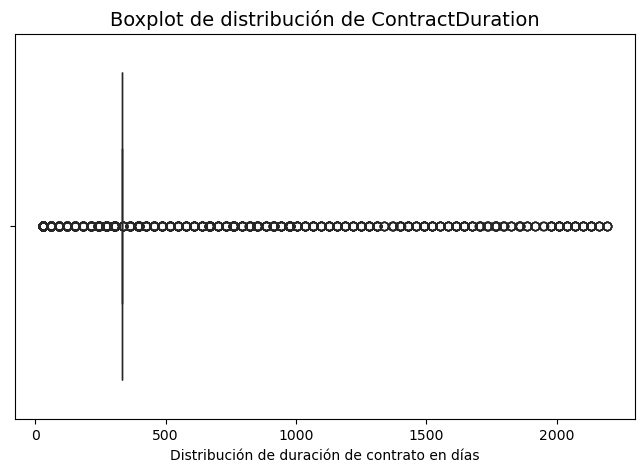

In [32]:
# Boxplot de columna 'ContractDuration'
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x=merged_data['ContractDuration'], color='green')
plt.title('Boxplot de distribución de ContractDuration', fontsize=14)
plt.xlabel('Distribución de duración de contrato en días')
plt.show()

El boxplot inicial, está saturado de valores atípicos, al grado que ni siqueira el índice intercuartílico puede apreciarse. Por lo que a continuación se rasurarán los valores atípicos para evitar que afecte el modelo.

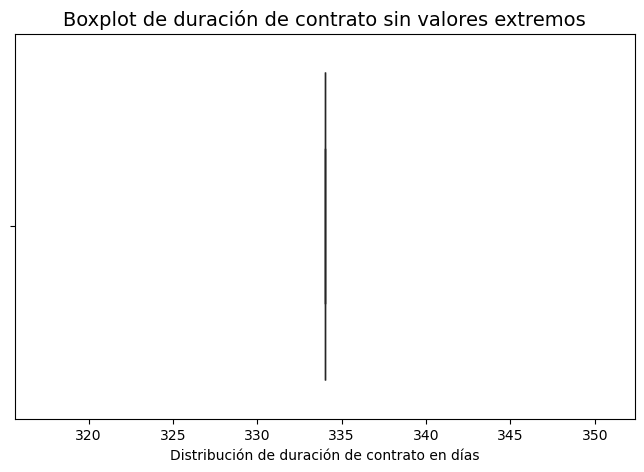

In [33]:
# Filtrar valores atípicos usando el rango intercuartílico (IQR)

# Primer cuartil
Q1 = merged_data['ContractDuration'].quantile(0.25)

# Tercer cuartil
Q3 = merged_data['ContractDuration'].quantile(0.75)  

# Rango intercuartílico
IQR = Q3 - Q1  

# Filtrar datos dentro de 1.5 * IQR
filtered_data = merged_data[(merged_data['ContractDuration'] >= Q1 - 1.5 * IQR) & (merged_data['ContractDuration'] <= Q3 + 1.5 * IQR)]

# Crear el boxplot con datos filtrados
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data, x=filtered_data['ContractDuration'], color='green')
plt.title('Boxplot de duración de contrato sin valores extremos', fontsize=14)
plt.xlabel('Distribución de duración de contrato en días')
plt.show()

Como puede observarse, después de rasurar lso valores atípicos del boxplot está demasiado comprimidos, por lo que no puede apreciarse.  
Por eso, la columna 'ContractDuration' se dividirá por segmentos de duración y se analziará cada segmento.

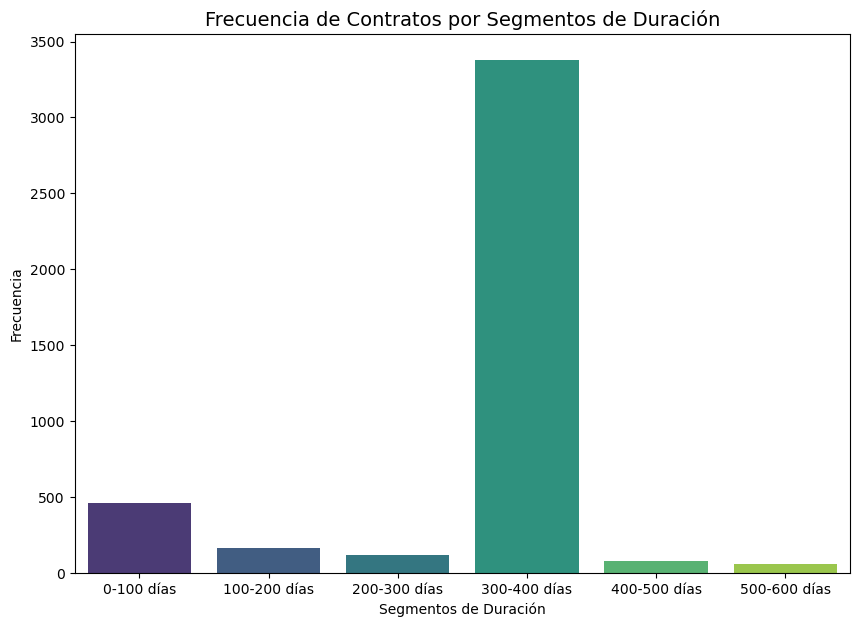

In [34]:
# Crear un gráfico de barras que permita apreciar tendencias en duración del contrato por segmentos de usuarios
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100 días', '100-200 días', '200-300 días', '300-400 días', '400-500 días', '500-600 días']

# Crear segmentos de duración
merged_data['DurationSegment'] = pd.cut(merged_data['ContractDuration'], bins=bins, labels=labels)

# Crear gráfico de barras para los segmentos ajustados
plt.figure(figsize=(10, 7))
sns.countplot(data=merged_data, x='DurationSegment', hue='DurationSegment', palette='viridis', dodge=False, legend=False)
plt.title('Frecuencia de Contratos por Segmentos de Duración', fontsize=14)
plt.xlabel('Segmentos de Duración')
plt.ylabel('Frecuencia', rotation=90)
plt.show()

Se decidió usar un histograma que permita mostrar las principales tendencias, ya que la visualziación por medio de boxplot no fue efectiva, debido a la excesiva presencia de valores atípicos y su compresión.  

Es evidente que la vasta mayoría de clientes oscila entre 300 y 400 días de duración del contrato, mientras que el grupo menos representativo es de 500 a 600 días.  
Lo que sugiere que los clientes prefieren contratos de aproximadamente un año. 

## Analizar clientes según estado de cancelación 

In [35]:
# Segmentar clientes como cancelled (1) y active (0) usando columna 'OriginalChurn'
cancelled = merged_data[merged_data['OriginalChurn'] == 1]
active = merged_data[merged_data['OriginalChurn'] == 0]

# Verificar el tamaño de cada grupo
print(f"Clientes cancelled: {len(cancelled)}")
print(f"Clientes active: {len(active)}")

Clientes cancelled: 3246
Clientes active: 1586


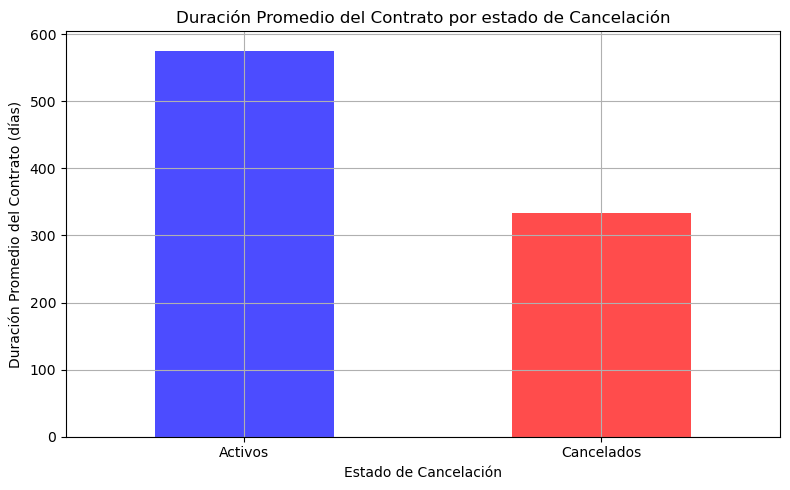

In [36]:
# Calcular promedio de días en 'ContractDuration' por estado de cancelación
average_duration = merged_data.groupby('OriginalChurn')['ContractDuration'].mean()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
average_duration.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Duración Promedio del Contrato por estado de Cancelación')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Duración Promedio del Contrato (días)')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0) 
plt.tight_layout()
plt.grid(True)
plt.show()

El promedio de duración del contrado de los clientes activos (casi 600 días), aproximadamente el doble que el de los cancelados (por encima de 300 días), o sea que los clientes que cancelan lo hacen al rededor de cumplir un año con el servicio.

<Figure size 1200x800 with 0 Axes>

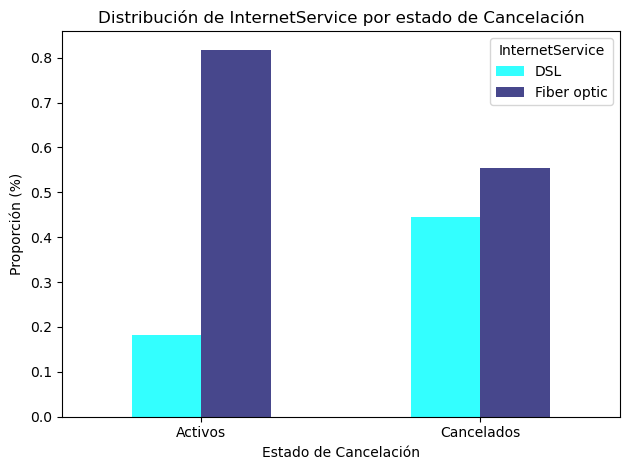

<Figure size 1200x800 with 0 Axes>

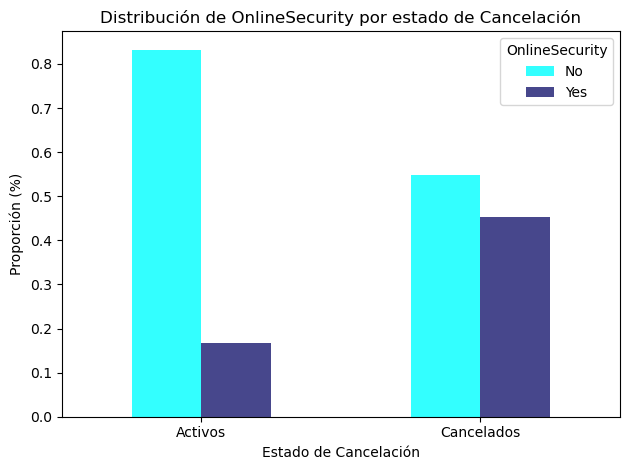

<Figure size 1200x800 with 0 Axes>

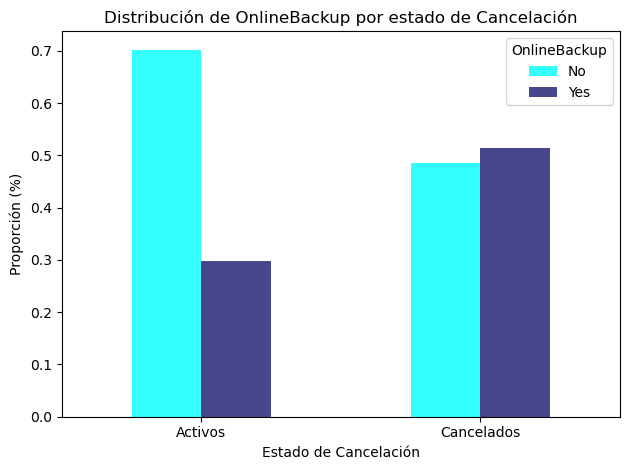

<Figure size 1200x800 with 0 Axes>

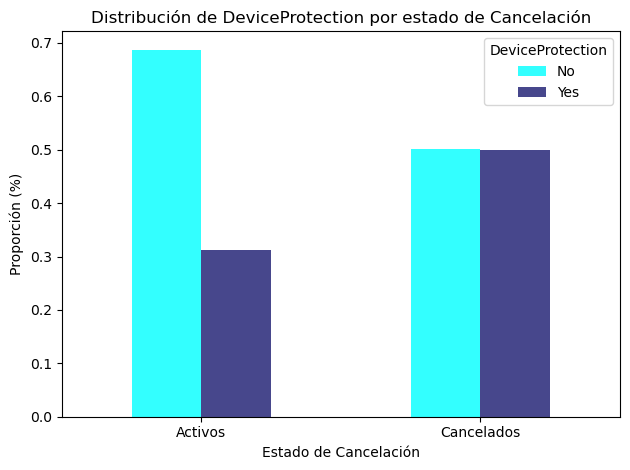

<Figure size 1200x800 with 0 Axes>

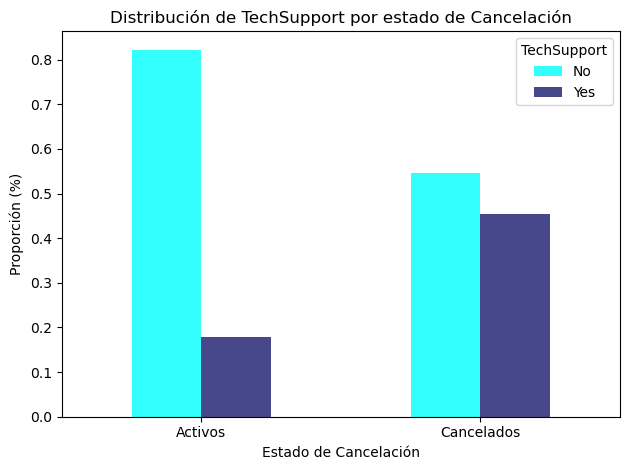

<Figure size 1200x800 with 0 Axes>

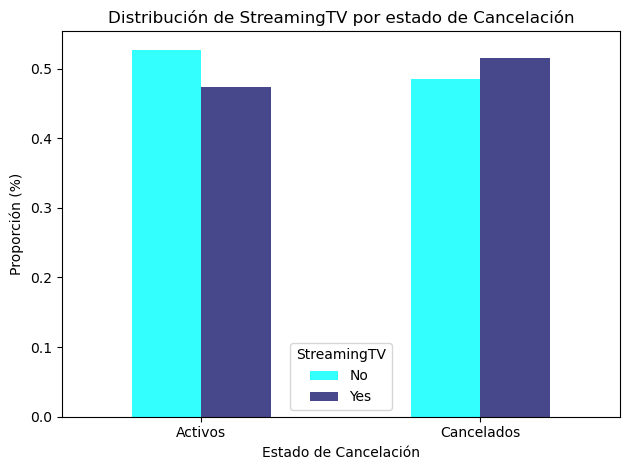

<Figure size 1200x800 with 0 Axes>

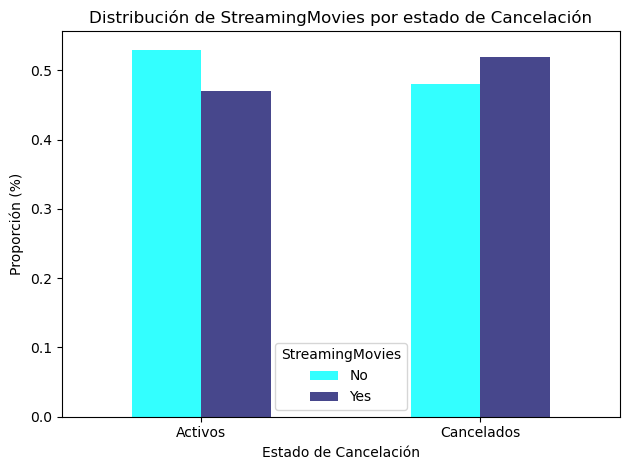

<Figure size 1200x800 with 0 Axes>

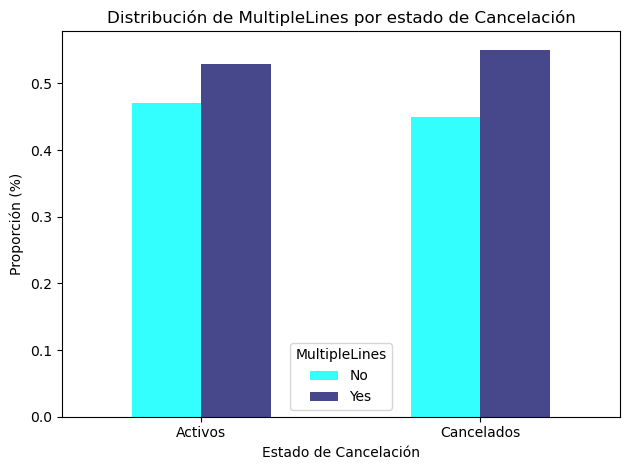

In [37]:
# Comparar servicios adicionales de internet y telefonía por estado de cancelación

# Agrupar por estado de cancelación y calcular proporción de uso para servicios adicionales de Internet y telefonía
internet_services = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
service_distribution = merged_data.groupby('OriginalChurn')[internet_services].apply(lambda x: x.value_counts(normalize=True))

# Crear gráficos de barras para cada servicio adicional de internet
for service in internet_services:
    plt.figure(figsize=(12, 8))
    distribution = merged_data.groupby('OriginalChurn')[service].value_counts(normalize=True).unstack()
    distribution.plot(kind='bar', stacked=False, color=['cyan', 'midnightblue'], alpha=0.8)
    plt.title(f'Distribución de {service} por estado de Cancelación')
    plt.xlabel('Estado de Cancelación')
    plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'])
    plt.xticks(rotation=0)
    plt.ylabel('Proporción (%)')
    plt.legend(title=service)
    plt.tight_layout()
    plt.show()
    plt.close()  # Cerrar cada gráfica después de mostrarla

- InternetService: El 80% de los clientes activos usa fibra óptica, mientras que sólo el 50% de los cancelados la tenía, sugiriendo que la velocidad es importante.  

- OnlineSecurity: La mayoría de los clientes no lo tiene; sin embargo, más del 40% de los cancelados sí, lo que podría indicar insatisfacción.  

- OnlineBackup: Más del 50% de los cancelados lo usaban, mientras que la mayoría de los activos no, reflejando posible desagrado.  

- DeviceProtection: Cerca del 70% de los activos no lo contrató. Entre los cancelados, la proporción es cercana al 50/50, pareciendo no ser decisivo.  

- TechSupport: Tanto activos como cancelados lo evitaron, sugiriendo poca influencia en la permanencia.

- StreamingTV y StreamingMovies: Se comportan similar, con proporciones equilibradas entre activos e inactivos, sin ser factores determinantes.  

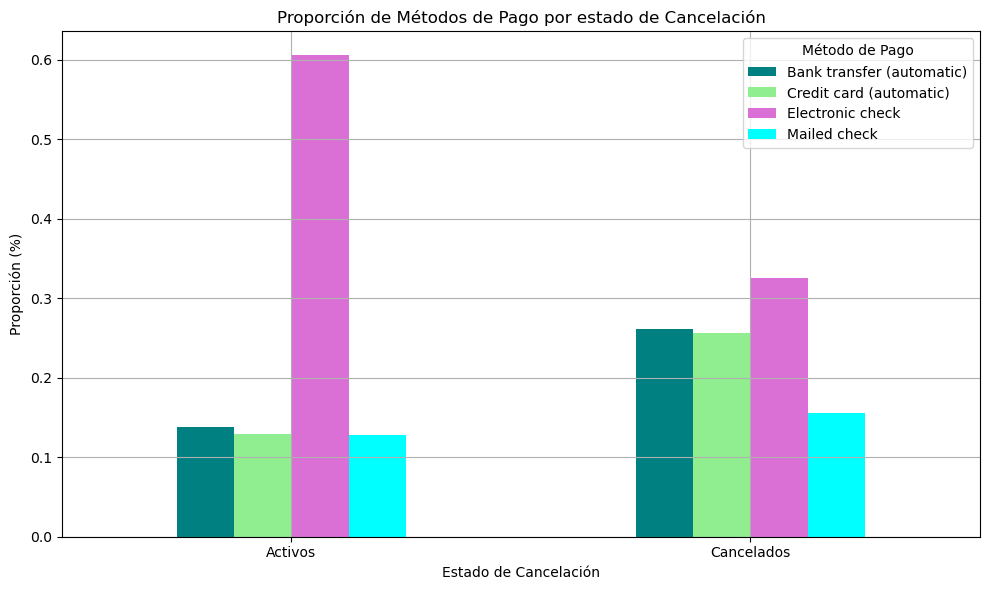

In [38]:
# Comparar proproción de métodos de pago por estado de cancelación

# Proporción de clientes por método de pago según estado de cancelación
payment_method = merged_data.groupby('OriginalChurn')['PaymentMethod'].value_counts(normalize=True).unstack()

# Gráfico de barras para métodos de pago
payment_method.plot(kind='bar', figsize=(10, 6), color=['Teal', 'Lightgreen', 'Orchid', 'Cyan'])
plt.title('Proporción de Métodos de Pago por estado de Cancelación')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Proporción (%)')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.legend(title='Método de Pago', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

El método de pago preferido por los usuarios es el cheque electrónico. Sin embargo, es interesante que los usuarios que cancelaron tienen una proporción mucho más elevada de otros métodos de pago como transferencia bancaria, tarjeta de crédito y cheque enviado por correo.   
Lo que a su vez, podría explicar que al rededor del 60% de los clientes activos prefieran el cheque electrónico para realizar sus pagos, quizá por practicidad o mayor rapidez.

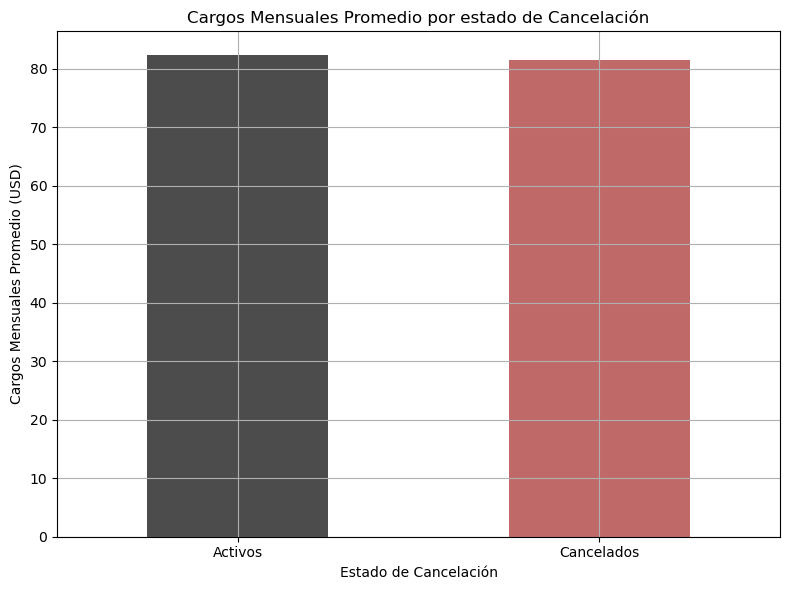

In [39]:
# Comparar promedio de cargos mensuales por estado de cancelación

# Promedio de cargos mensuales por estado de cancelación
average_charges = merged_data.groupby('OriginalChurn')['MonthlyCharges'].mean()

# Gráfico de barras para cargos mensuales
plt.figure(figsize=(8, 6))
average_charges.plot(kind='bar', color=['black', 'brown'], alpha=0.7)
plt.title('Cargos Mensuales Promedio por estado de Cancelación')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Cargos Mensuales Promedio (USD)')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

Ya que las columnas de clientes activos y cancelados es muy similar, se optó por agregar un gráfico de violín en la siguiente celda para mejorar la visualización

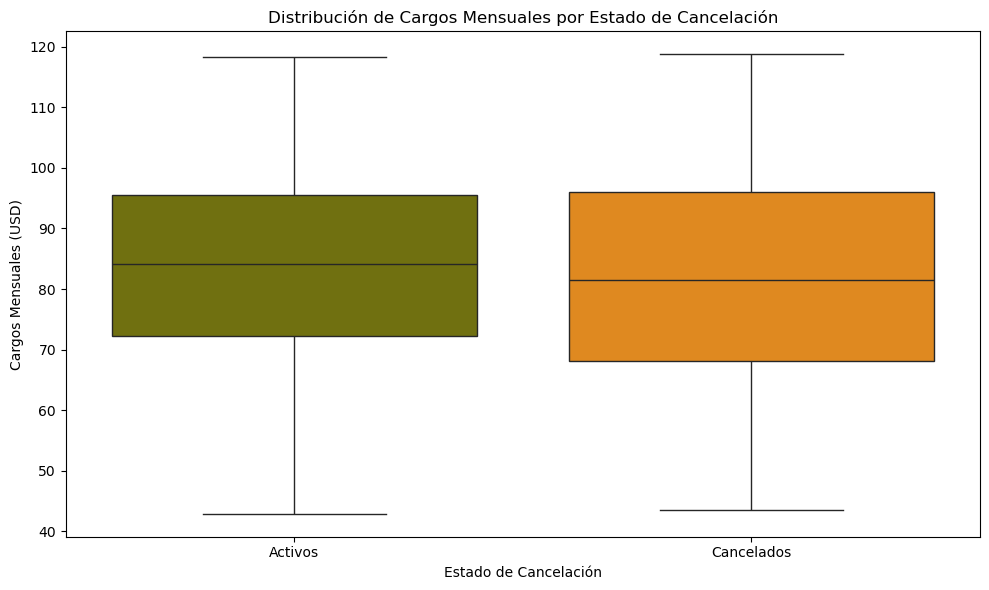

In [40]:
# Crear gráfico de violín de cargos mensuales promedio por estado de cancelación
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='OriginalChurn', y='MonthlyCharges', hue='OriginalChurn', palette=['Olive', 'Darkorange'], legend=False)
plt.title('Distribución de Cargos Mensuales por Estado de Cancelación')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Cargos Mensuales (USD)')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.tight_layout()
plt.show()

Los usuarios cancelados tienden a tener cargos mensuales más altos (85 USD frente a 80 USD aproximadamente), lo que podría indicar que ajustar las tarifas ayudaría a mejorar la retención.

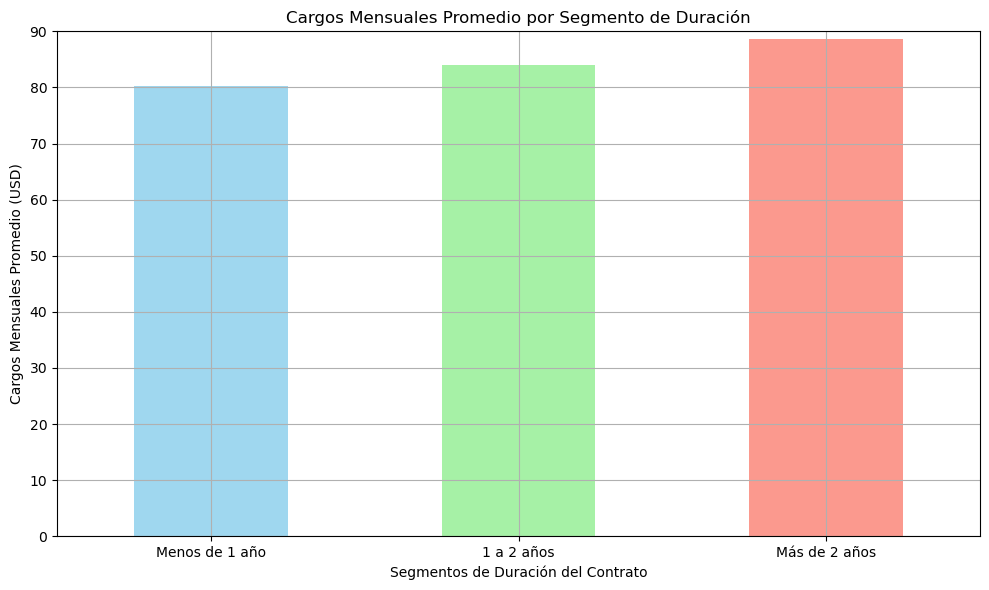

In [41]:
# Comparar cargos mensuales promedio por segmento de duración del contrato

# Crear segmentos de duración del contrato
bins = [0, 365, 730, 1095]
labels = ['Menos de 1 año', '1 a 2 años', 'Más de 2 años']
merged_data['DurationSegment'] = pd.cut(merged_data['ContractDuration'], bins=bins, labels=labels)

# Calcular promedio de cargos mensuales por segmento de duración
average_charges_by_segment = merged_data.groupby('DurationSegment', observed=True)['MonthlyCharges'].mean()

# Crear gráfico de barras para cargos mensuales promedio por segmento
plt.figure(figsize=(10, 6))
average_charges_by_segment.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], alpha=0.8)
plt.title('Cargos Mensuales Promedio por Segmento de Duración')
plt.xlabel('Segmentos de Duración del Contrato')
plt.ylabel('Cargos Mensuales Promedio (USD)')
plt.xticks(rotation=0)
plt.grid(True)

# Establecer el rango del eje y a 90 usd
plt.ylim(0, 90)

plt.tight_layout()
plt.show()

Los clientes con contratos más largos, pagan más en promedio, lo que sugiere que están dispuestos a invertir más en compromisos a largo plazo. Esta tendencia podría ser útil para diseñar estrategias de precios o promociones enfocadas en la duración del contrato para mejorar la retención de usuarios.

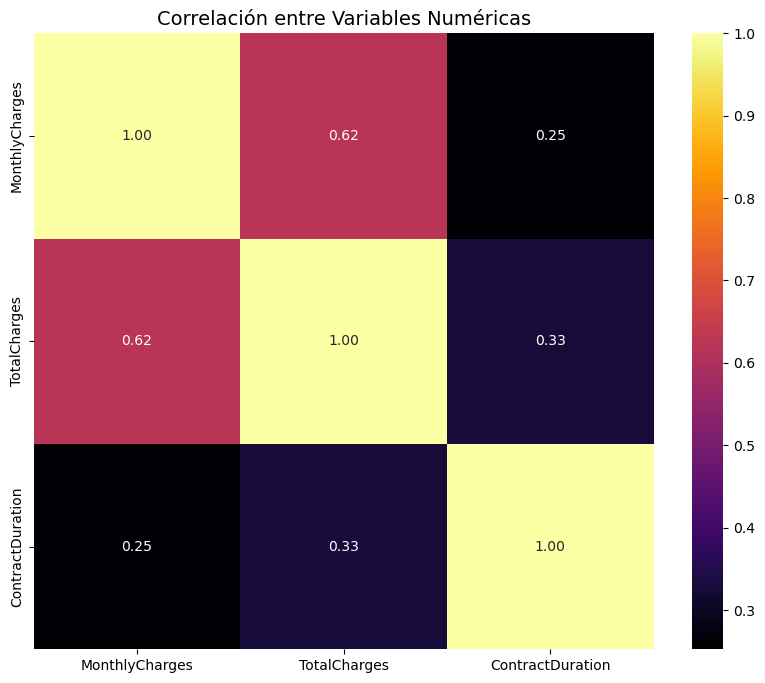

In [42]:
# Heatmap de correlación de las variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[['MonthlyCharges', 'TotalCharges', 'ContractDuration',]].corr(), annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlación entre Variables Numéricas', fontsize=14)
plt.show()

La correlación más significativa es entre 'MonthlyCharges' y 'TotalCharges' (0.62), lo que indica que los cargos mensuales influyen directamente en los cargos totales. Las correlaciones con 'ContractDuration' son más débiles, lo que sugiere que la duración del contrato tiene menos impacto en los cargos. Esto podría ayudar a enfocar estrategias en la relación entre pagos y servicios.

## Análisis de variables categóricas relevantes

Se buscará encontrar la correlación entre 'SeniorCitizen' , 'ContractDuration' y 'MonthlyCharges' por medio de la visualziación de un heatmap.

También, se analizarán las proporciones de clientes con pareja, dependientes económicos, tipo de contrato y uso de facturación electrónica según el estado de cancelación.

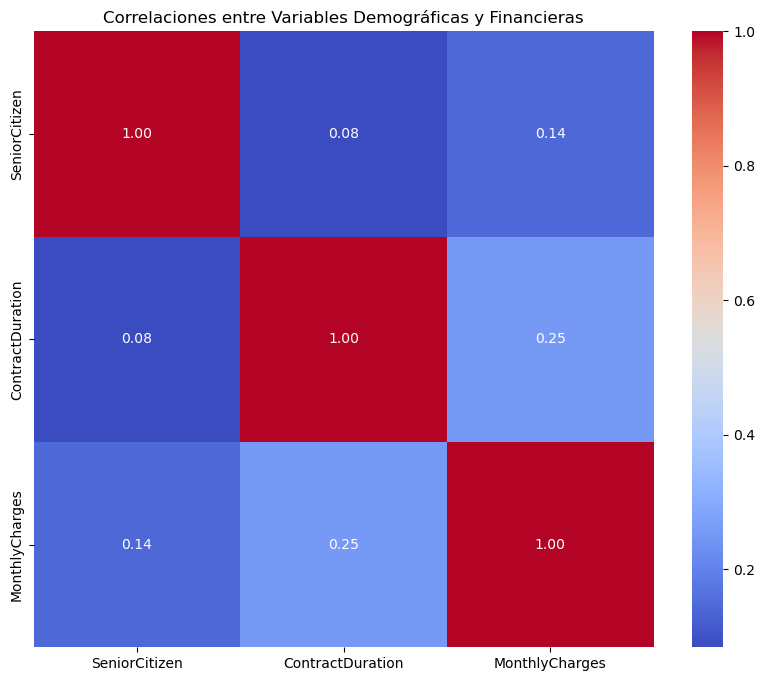

In [43]:
# Selección de variables demográficas y financieras para calcular correlaciones
demographic_columns = ['SeniorCitizen', 'ContractDuration', 'MonthlyCharges']
correlation_matrix = merged_data[demographic_columns].corr()

# Crear heatmap para correlaciones demográficas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones entre Variables Demográficas y Financieras')
plt.show()

La correlación fue más baja de lo esperado entre 'SeniorCitizen' y las otras columnas numéricas. Sugiriendo no tener un impacto decisivo en la cancelación.

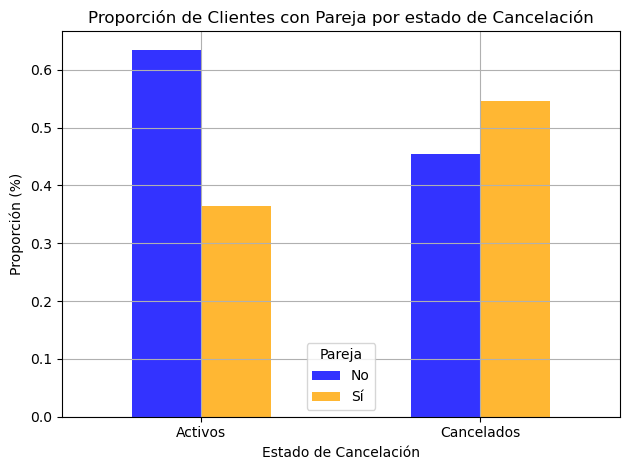

In [44]:
# Proporción de clientes con pareja por estado de cancelación
partner_distribution = merged_data.groupby('OriginalChurn')['Partner'].value_counts(normalize=True).unstack()
partner_distribution.plot(kind='bar', stacked=False, color=['blue', 'orange'], alpha=0.8)
plt.title('Proporción de Clientes con Pareja por estado de Cancelación')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Proporción (%)')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.legend(title='Pareja', labels=['No', 'Sí'])
plt.tight_layout()
plt.grid(True)
plt.show()

Los clientes sin pareja predominan entre los activos, mientras que los clientes con pareja son mayoría entre los cancelados. Esto sugiere que el estado civil podría influir en las tasas de cancelación, quizá por un mayor número de gastos en pareja.

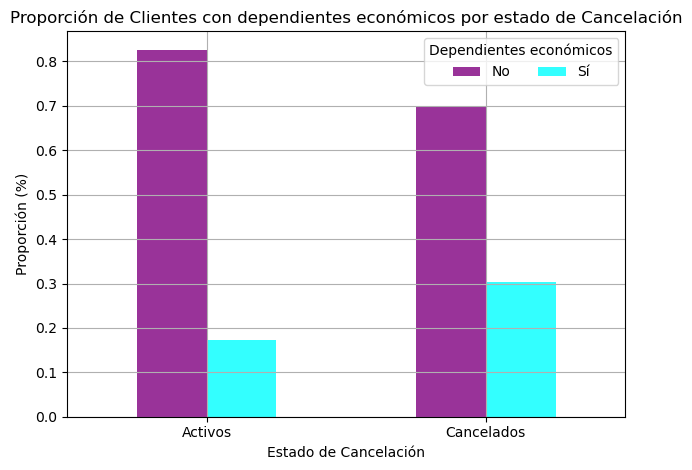

In [45]:
# Proporción de clientes con dependientes económicos por estado de cancelación
dependents_distribution = merged_data.groupby('OriginalChurn')['Dependents'].value_counts(normalize=True).unstack()
dependents_distribution.plot(kind='bar', stacked=False, color=['purple', 'cyan'], alpha=0.8)
plt.title('Proporción de Clientes con dependientes económicos por estado de Cancelación')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Proporción (%)')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.legend(title='Dependientes económicos', labels=['No', 'Sí'], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=2)
plt.tight_layout()
plt.grid(True)
plt.show()

La mayoría de los clientes, tanto activos como cancelados, no tienen dependientes económicos. Sin embargo, en el caso de los cancelados, la proporción de aquellos con dependientes económicos es mayor. Esto podría sugerir que este grupo enfrenta mayores restricciones financieras o compromisos familiares que podrían influir en su decisión de cancelar.   
De ser el caso paquetes familiares o promocionales podrían ayudar a mejorar la retención,

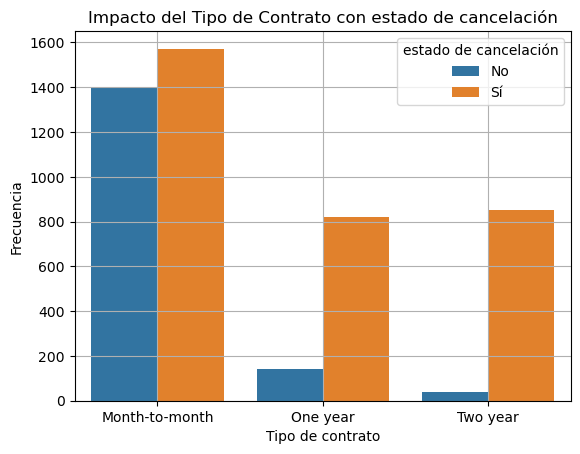

In [46]:
# Gráfico que muestre el tipo de contrato y estado de cancelación
sns.countplot(data=merged_data, x='Type', hue='OriginalChurn')
plt.title('Impacto del Tipo de Contrato con estado de cancelación')
plt.legend(title='estado de cancelación', labels=['No', 'Sí'])
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de contrato')
plt.grid(True)
plt.show()

Conforme los contratos son más largos, la frecuencia de cancelación es de aproximadamente la mitad, aunque la proporción de clientes activos también disminuye. Lo que podría sugerir que los contratos más largos tienen menos frecuecia de cancelación.  
De este modo, promociones o programas de lealtad podrían mejorar la retención de usuarios.

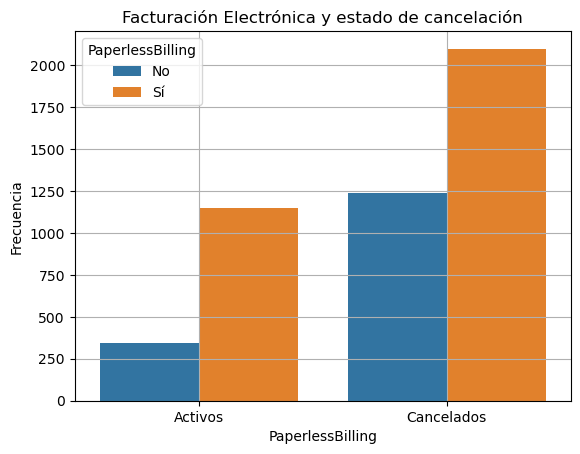

In [47]:
# Gráfico que muestre facturación electrónica 'PaperlessBilling' y estado de cancelación
sns.countplot(data=merged_data, x='PaperlessBilling', hue='OriginalChurn')
plt.title('Facturación Electrónica y estado de cancelación')
plt.xticks(ticks=[0, 1], labels=['Activos', 'Cancelados'], rotation=0)
plt.legend(title='PaperlessBilling', labels=['No', 'Sí'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Pareciera que la facturación electrónica no tiene un impacto significativo en la retención de usuarios.  

## Conclusiones de Exploración de datos

Se realizaron visualizaciones de datos numéricos para analizar tendencias, valores atípicos y distribuciones.  

Se agruparon los clientes por duración del contrato, servicios adicionales, métodos de pago y cargos mensuales promedio según el estado de cancelación.  

También, se generaron heatmaps para examinar correlaciones entre variables numéricas, demográficas y financieras. Finalmente, se analizaron proporciones relacionadas con tipos de contrato y facturación electrónica por estado de cancelación